In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
data = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
print(np.sum(np.array(data.iloc[:,-1]) == 1) + np.sum(np.array(data.iloc[:,-1]) == 0))
data.shape

303


(303, 14)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [7]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1:]
X_tr,X_ts,Y_tr,Y_ts = train_test_split(X,Y,test_size = 0.3)
m_tr = Y_tr.shape[0]
m_ts = Y_ts.shape[0]
y_tr = np.array(Y_tr)[:,0]
y_ts = np.array(Y_ts)[:,0]
print(X.shape,Y.shape)
print(X_tr.shape,y_tr.shape)

(303, 13) (303, 1)
(212, 13) (212,)


In [8]:
clf = LogisticRegression(random_state=0).fit(X_tr, Y_tr)
y_pr = clf.predict(X_ts)
np.sum(y_pr==np.array(Y_ts).flatten()) / m_ts
clf.score(X_ts, y_ts)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8351648351648352

In [9]:
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score,roc_auc_score,roc_curve
print(confusion_matrix(y_pr,y_ts))
print('precision_score = ',precision_score(y_pr,y_ts))
print('recall_score = ',recall_score(y_pr,y_ts))
print('f1_score = ',f1_score(y_pr,y_ts))

[[33  6]
 [ 9 43]]
precision_score =  0.8775510204081632
recall_score =  0.8269230769230769
f1_score =  0.8514851485148514


In [10]:
roc_curve(y_pr,y_ts)

(array([0.        , 0.15384615, 1.        ]),
 array([0.        , 0.82692308, 1.        ]),
 array([2, 1, 0]))

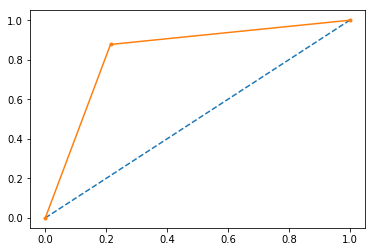

In [11]:
from sklearn.metrics import roc_curve,roc_auc_score

import matplotlib.pyplot as plt

roc_auc_score(list(y_ts),list(y_pr))
fpr,tpr,thresholds=roc_curve(y_ts,y_pr)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()